# DS1 Final project
group: BDA 2205 (Alibek Mussabek, Beknur Erzhanov, Sabina Kim)

## Cardiovascular_Disease_Dataset

### Content
+ Introduction
+ Data description and objectives
+ Data acquisiton, manipulation and validation
+ Data analysis and visualization 
+ Conclusion

## 1.Introduction


The Cardiovascular Disease Dataset is a meticulously compiled collection of data sourced from a prominent multispecialty hospital in India. With a focus on heart health, this dataset encompasses over 14 common features meticulously documented for 1000 subjects. Each subject's profile includes a comprehensive array of 12 distinct features, ranging from demographic information to clinical indicators, vital signs, and medical history.

Beyond its sheer breadth, the dataset's significance lies in its potential to revolutionize cardiovascular care. It serves as a vital tool for researchers and practitioners alike, offering a rich resource for exploring the intricacies of heart disease. By leveraging advanced analytics and machine learning techniques, this dataset facilitates the development of early-stage detection systems and predictive models, paving the way for more proactive interventions and improved patient outcomes.

The Cardiovascular Disease Dataset stands as a testament to the power of data-driven research in healthcare. It not only provides invaluable insights into the complexities of cardiovascular health but also holds the promise of transforming the landscape of cardiac care. With each analysis and discovery, researchers move closer to a future where heart disease is not only treatable but preventable, ushering in an era of enhanced well-being for individuals worldwide.

Source: Doppala, Bhanu Prakash; Bhattacharyya, Debnath (2021), “Cardiovascular_Disease_Dataset”, Mendeley Data, V1, doi: 10.17632/dzz48mvjht.1 

## 2. Data description and objectives

Based on the description provided for the Cardiovascular Disease Dataset, it's evident that the dataset comprises crucial attributes essential for analyzing and understanding heart health. Below is a breakdown of the attributes and their significance:

+ Patient ID (patientid): Unique numerical identifier for tracking records.
+ Age: Patients' age in years, crucial for demographic analysis.
+ Gender: Binary representation (0 for female, 1 for male), revealing gender-specific trends.
+ Chest Pain Type (chestpain): Categorizes chest pain into four types:0 (typical angina), 1 (atypical angina), 2 (non-anginal pain), 3 (asymptomatic)
+ Resting Blood Pressure (restingBP): Patients' resting blood pressure in mm Hg, indicating hypertension risk.
+ Serum Cholesterol (serumcholestrol): Levels of serum cholesterol in mg/dl, assessing lipid profiles.
+ Fasting Blood Sugar (fastingbloodsugar): Binary indicator (0 for normal, 1 for elevated) of fasting blood sugar (>120 mg/dl), signaling diabetes risk.
+ Resting Electrocardiogram (restingrelectro): Categorizes ECG results into three types: 0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy).
+ Max Heart Rate (maxheartrate): Patients' maximum heart rate achieved during exercise, reflecting cardiovascular fitness.
+ Exercise Induced Angina (exerciseangia): Binary indicator (0 for no, 1 for yes) of exercise-induced angina, indicating coronary artery disease presence.
+ ST Depression (oldpeak): ST segment depression relative to rest, evaluating ischemia severity.
+ Slope of Exercise ST Segment (slope): Categorizes slope of exercise ST segment into four types: 0, 1 (upsloping), 2 (flat), 3 (downsloping).
+ Number of Major Vessels (noofmajorvessels): Indicates major vessels colored by fluoroscopy, revealing coronary artery disease extent.
+ Classification (target): Binary classification (0 for no heart disease, 1 for presence), used for predictive modeling in heart disease detection. Heart Disease)
Research questions:               
1) What is the distribution of gender and age among individuals classified with and without heart disease? 
2) How do various factors relate to the presence of heart disease?
3) How does the distribution of blood pressure compare to that of cholesterol levels?
4) Is there a significant difference in the prevalence and severity of cardiovascular risk factors and associated health conditions between individuals aged over 60 with and without heart disease??
5) Is it possible to construct a regression model that predicts cardiovascular disease risk based on all available traits?

## 3. Data acquisiton, manipulation and validation

### 3.1. Data acquisiton

In this section, we focus on acquiring the dataset and loading it into our environment for further analysis. We utilize various Python libraries to handle data manipulation and validation tasks.

In [1]:
# import all modules that will be used
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load and observe data
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


  The dataset "Cardiovascular_Disease_Dataset.csv" is loaded into a pandas DataFrame named 'df' using the pd.read_csv() function. This dataset contains information about various attributes related to cardiovascular health, including patient ID, age, gender, chest pain type, blood pressure, cholesterol levels, electrocardiogram results, heart rate, presence of angina, ST depression, slope of exercise ST segment, number of major vessels, and classification of the presence or absence of heart disease.
  Upon loading the data, we display the first few rows using the head() function to gain a preliminary understanding of the dataset's structure and contents.


### 3.2. Data manipulation: cleaning and shapingnt analysis.

In this section, we focus on cleaning and shaping the dataset to ensure its quality and suitability for further analysis. We perform various data manipulation tasks, including handling missing values, correcting data types, categorizing variables, and checking for inconsistencies.

- Handling Missing Values:
We start by examining the dataset for any missing values using the `isnull().sum()` function. Fortunately, there are no missing values in the dataset, eliminating the need for imputation or removal.
- Correcting Data Types:
Next, we ensure that each column has the correct data type. Upon inspection using the `info()` function, it is confirmed that all columns have the appropriate data types, requiring no further action.
- Categorizing Blood Pressure and Cholesterol Levels:
To simplify analysis, we categorize blood pressure and cholesterol levels based on predefined thresholds. Two functions, `categorize_blood_pressure()` and `categorize_cholesterol()`, are defined to categorize blood pressure and cholesterol levels, respectively. These functions are then applied to create new columns in the DataFrame, namely 'blood_pressure_category' and 'cholesterol_category'.
- Checking for Inconsistencies:
Lastly, we perform a final check for any inconsistencies in the dataset and eliminate them if found. This ensures the dataset's integrity and reliability for subsequent analysis.

In [3]:
df.shape

(1000, 14)

+ Dropping Irrelevant Columns:
   Initially, columns deemed irrelevant for analysis, namely 'restingrelectro', 'exerciseangia', and 'noofmajorvessels', were dropped from the dataset to focus on key attributes related to cardiovascular health.

In [4]:
update = df.drop(columns=['restingrelectro', 'exerciseangia', 'noofmajorvessels' ], inplace=True,axis=1)

+ Handling Missing Values:
   The dataset was examined for missing values using the `isnull().sum()` function. Fortunately, no missing values were detected, eliminating the need for imputation or removal

In [5]:
# Handling missing values
# Let's check if there are any missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
# Since there are no missing values, we don't need to handle them in this case.

Missing Values:
 patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
maxheartrate         0
oldpeak              0
slope                0
target               0
dtype: int64


Upon executing `df.describe().T.style.background_gradient(axis=0)`, we generate a descriptive summary of the dataset's numerical attributes in a tabular format. This summary provides insights into the central tendency, dispersion, and distribution of each numerical variable, facilitating a preliminary understanding of the dataset's characteristics.

However, during the exploration, it was noticed that some entries in the 'serumcholestrol' column have a value of 0, which is not physiologically plausible. In response, we decided to filter out these entries from the dataset using the condition `df = df[df['serumcholestrol'] != 0]`. This step ensures data integrity and reliability by removing erroneous entries that could potentially skew analysis results.

By eliminating entries with serum cholesterol values of 0, we maintain the dataset's quality and validity for subsequent analysis. This action enhances the accuracy of descriptive statistics and insights derived from the dataset, allowing for more meaningful interpretation and decision-making.

In [6]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,5048704.412000,2895904.500488,103368.000000,2536439.500000,4952508.500000,7681877.000000,9990855.000000
age,1000.000000,49.242000,17.864730,20.000000,34.000000,49.000000,64.250000,80.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.980000,0.953157,0.000000,0.000000,1.000000,2.000000,3.000000
restingBP,1000.000000,151.747000,29.965228,94.000000,129.000000,147.000000,181.000000,200.000000
serumcholestrol,1000.000000,311.447000,132.443801,0.000000,235.750000,318.000000,404.250000,602.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
maxheartrate,1000.000000,145.477000,34.190268,71.000000,119.750000,146.000000,175.000000,202.000000
oldpeak,1000.000000,2.707700,1.720753,0.000000,1.300000,2.400000,4.100000,6.200000
slope,1000.000000,1.540000,1.003697,0.000000,1.000000,2.000000,2.000000,3.000000


In [7]:
df = df[df['serumcholestrol'] != 0]

In [8]:
#insure that each column has the correct data type
df.info()
#Since each column has correct datatype, we don't need to handle them in this case.

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          947 non-null    int64  
 1   age                947 non-null    int64  
 2   gender             947 non-null    int64  
 3   chestpain          947 non-null    int64  
 4   restingBP          947 non-null    int64  
 5   serumcholestrol    947 non-null    int64  
 6   fastingbloodsugar  947 non-null    int64  
 7   maxheartrate       947 non-null    int64  
 8   oldpeak            947 non-null    float64
 9   slope              947 non-null    int64  
 10  target             947 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 88.8 KB


Categorizing Blood Pressure and Cholesterol Levels:
   Two categorical functions, `categorize_blood_pressure()` and `categorize_cholesterol()`, were defined to categorize blood pressure and cholesterol levels based on predefined thresholds. These functions were then applied to create new categorical columns, 'blood_pressure_category' and 'cholesterol_category', respectively, facilitating easier analysis and interpretation

In [9]:
# Define a function to categorize blood pressure
def categorize_blood_pressure(bloodpressure):
    if bloodpressure < 120:
        return "Normal"
    elif 120 <= bloodpressure < 130:
        return "Elevated"
    elif 130 <= bloodpressure < 140:
        return "Stage 1 Hypertension"
    else:
        return "Stage 2 Hypertension"
 
# Define a function to categorize cholesterol levels
def categorize_cholesterol(cholesterol):
    if cholesterol < 200:
        return "Desirable"
    elif 200 <= cholesterol < 240:
        return "Borderline High"
    else:
        return "High"
 
# Apply the categorization functions to create new columns
df.loc[:, 'blood_pressure_category'] = df['restingBP'].apply(categorize_blood_pressure)
df.loc[:, 'cholesterol_category'] = df['serumcholestrol'].apply(categorize_cholesterol)
 
# Save the updated DataFrame to a new CSV file
df.to_csv('update.csv', index=False)
df = pd.read_csv('update.csv')

Renaming Columns:
   Column names were appropriately renamed to enhance readability and clarity. The column names were updated to reflect their respective attributes accurately.

In [10]:
#assign appropriate column names
df.columns = ["Patient Identification Number", "Age", "Gender", "Chest pain type", "Resting blood pressure", \
              "Serum cholesterol", "Fasting blood sugar", "Maximum heart rate achieved", \
              "Oldpeak", "Slope of the peak",  "Classification", "Blood pressure category", "Cholesterol category"]
df.head()

,Patient Identification Number,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Maximum heart rate achieved,Oldpeak,Slope of the peak,Classification,Blood pressure category,Cholesterol category
0,119250,40,1,0,94,229,0,115,3.7,1,0,Normal,Borderline High
1,119372,49,1,2,133,142,0,202,5.0,1,0,Stage 1 Hypertension,Desirable
2,132514,43,1,0,138,295,1,153,3.2,2,1,Stage 1 Hypertension,High
3,168686,79,1,2,130,240,0,157,2.5,2,1,Stage 1 Hypertension,High
4,170498,52,1,0,127,345,0,192,4.9,1,0,Elevated,High


In [11]:
df.shape

(947, 13)

After completing these data manipulation steps, the dataset is now refined and prepared for further exploratory data analysis, visualization, and modeling. These preparatory steps lay the groundwork for gaining insights into cardiovascular health and disease risk factors from the dataset.

## 4. Data analysis and visualization 

In this section, we aim to address the objectives of the project by conducting data analysis and visualization techniques on the prepared dataset. We explore various factors related to cardiovascular health and investigate their relationships with the presence of heart disease. Additionally, we assess the distribution of blood pressure and cholesterol levels and examine potential differences in cardiovascular risk factors among different age groups. 

### 4.1.What is the distribution of gender and age among individuals classified with and without heart disease?

We begin by examining the distribution of gender and age among individuals classified with and without heart disease. This analysis provides insights into demographic patterns and potential associations with heart health.

Age Range:
The dataset comprises individuals with ages ranging from 20 to 80 years. This broad age range allows for a comprehensive analysis of cardiovascular health across different life stages.

Gender Distribution:
Among the individuals in the dataset, there are a total of 724 males and 223 females. This distribution provides insights into the gender composition of the study population.

Age Range: 20 - 80
Mean Age: 49.30
25th percentile: 34.00
75th percentile: 65.00


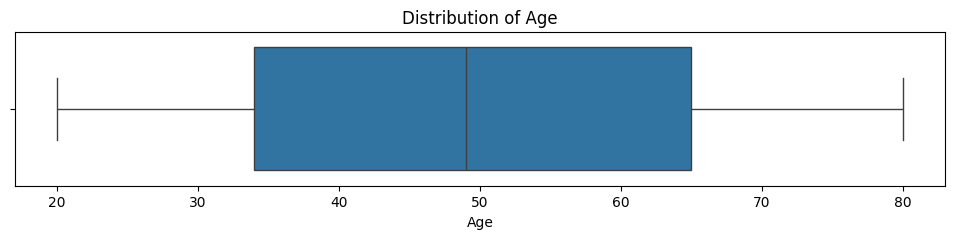

In [12]:
age_range = f"Age Range: {df['Age'].min()} - {df['Age'].max()}"
mean_age = f"Mean Age: {df['Age'].mean():.2f}"
q25_age = f"25th percentile: {np.percentile(df['Age'], 25):.2f}"
q75_age = f"75th percentile: {np.percentile(df['Age'], 75):.2f}"

print(age_range)
print(mean_age)
print(q25_age)
print(q75_age)

plt.figure(figsize=(12, 2))
sns.boxplot(data=df, x='Age')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

Distribution of Gender:
Gender
1    724
0    223
Name: count, dtype: int64

Percentage of Gender:
Gender
1    76.451954
0    23.548046
Name: count, dtype: float64


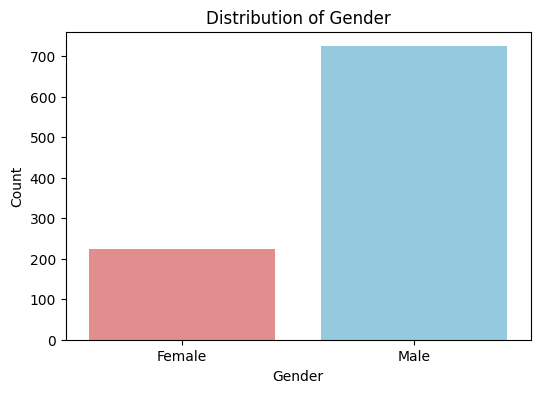

In [13]:
# Count the occurrences of each gender
gender_count = df['Gender'].value_counts()

# Calculate the percentage of each gender
gender_percentage = gender_count / gender_count.sum() * 100

# Print count and percentage
print("Distribution of Gender:")
print(gender_count)
print("\nPercentage of Gender:")
print(gender_percentage)

# Define custom colors for each gender
colors = ['lightcoral', 'skyblue']

# Visualization using a bar plot with custom colors and hue
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='count', data=gender_count.reset_index(), palette=colors, hue='Gender', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])  # Customizing x-axis labels
plt.show()

Age Distribution by Gender:
Visualizing the age distribution by gender reveals interesting patterns. The histogram plot illustrates the distribution of age among males and females, with stacked bars indicating the proportion of each gender within different age groups. This visualization allows for a comparison of age distributions between genders.

The visualization above illustrates the distribution of age among individuals in the dataset, segmented by gender. The histogram depicts the count of individuals within different age groups, with separate bars representing males and females. 

The distribution appears to be relatively uniform across age groups, with a slight peak in the middle-aged range. However, it's worth noting that there are more males represented in the dataset compared to femal

1. Maximum Count:
   The age group with the maximum count of individuals is 20-25 years, with 96 individuals. This age group represents the largest segment of the study population.

2. Minimum Count:
   The age group with the minimum count of individuals is 65-70 years, with 66 individuals. This age group has the smallest representation in the dataset.es

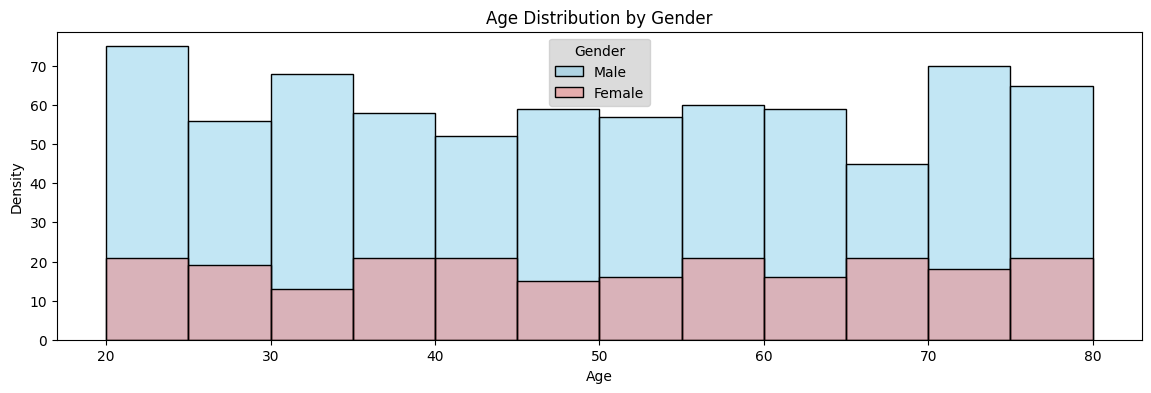

Number of individuals aged 20-25: 96
Number of individuals aged 25-30: 75
Number of individuals aged 30-35: 81
Number of individuals aged 35-40: 79
Number of individuals aged 40-45: 73
Number of individuals aged 45-50: 74
Number of individuals aged 50-55: 73
Number of individuals aged 55-60: 81
Number of individuals aged 60-65: 75
Number of individuals aged 65-70: 66
Number of individuals aged 70-75: 88
Number of individuals aged 75-80: 74


In [53]:
# Visualization with changed colors:
colors = ['lightcoral', 'skyblue']
plt.figure(figsize=(14, 4))
sns.histplot(x='Age', hue='Gender', data=df, bins=12, palette=colors)  # Applied palette
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Gender', labels=['Male', 'Female'], facecolor='lightgray')  # Adjusted legend color
plt.show()

# Number of individuals within specific age ranges
age_ranges = [(20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 55), (55, 60), (60, 65), (65, 70), (70, 75), (75, 80)]

for age_range in age_ranges:
    lower_bound, upper_bound = age_range
    number = len(df[(df['Age'] >= lower_bound) & (df['Age'] < upper_bound)])
    print(f"Number of individuals aged {lower_bound}-{upper_bound}: {number}")


Distribution of Age among Individuals with and without Heart Disease:
Further analysis focuses on individuals classified with and without heart disease. Two separate histograms are plotted to illustrate the distribution of age within each group. The density plots showcase the distribution of age for individuals with the presence and absence of heart disease, enabling comparisons between the two groups.

Analysis of Age Ranges:.
   - For each age range, the number of individuals with and without heart disease was calculated.
   - Analyzing the output, several insights can be gleaned:
      - Among individuals aged 20-30, there is a higher number of individuals with heart disease compared to those without.
      - The number of individuals without heart disease tends to decrease with age, while the number of individuals with heart disease shows varying patterns across different age ranges.
      - Notably, age ranges such as 40-45, 50-55, and 70-75 exhibit a relatively higher number of individuals with heart disease compared to adjacent age groups.
      - In contrast, the age range of 75-80 shows a higher number of individuals without heart disease compared to those with heart disease.

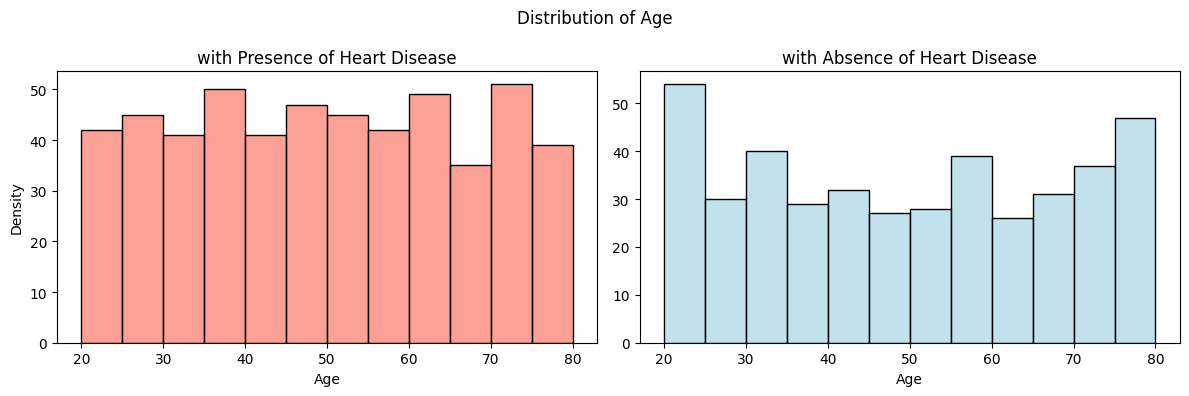

Age Range: 20-25
Number with Heart Disease: 42
Number without Heart Disease: 54 

Age Range: 25-30
Number with Heart Disease: 45
Number without Heart Disease: 30 

Age Range: 30-35
Number with Heart Disease: 41
Number without Heart Disease: 40 

Age Range: 35-40
Number with Heart Disease: 50
Number without Heart Disease: 29 

Age Range: 40-45
Number with Heart Disease: 41
Number without Heart Disease: 32 

Age Range: 45-50
Number with Heart Disease: 47
Number without Heart Disease: 27 

Age Range: 50-55
Number with Heart Disease: 45
Number without Heart Disease: 28 

Age Range: 55-60
Number with Heart Disease: 42
Number without Heart Disease: 39 

Age Range: 60-65
Number with Heart Disease: 49
Number without Heart Disease: 26 

Age Range: 65-70
Number with Heart Disease: 35
Number without Heart Disease: 31 

Age Range: 70-75
Number with Heart Disease: 51
Number without Heart Disease: 37 

Age Range: 75-80
Number with Heart Disease: 30
Number without Heart Disease: 44 



In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle('Distribution of Age')

sns.histplot(df.loc[df.Classification == 1]["Age"], ax=axes[0], bins=12, color='salmon')
axes[0].set_title('with Presence of Heart Disease')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

sns.histplot(df.loc[df.Classification == 0]["Age"], ax=axes[1], bins=12, color='lightblue')
axes[1].set_title('with Absence of Heart Disease')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Define age ranges
age_ranges = [(20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 55), (55, 60), (60, 65), (65, 70), (70, 75), (75, 80)]

# Number of individuals within specific age ranges
for age_range in age_ranges:
    lower_bound, upper_bound = age_range
    number_with_heart_disease = len(df[(df['Age'] >= lower_bound) & (df['Age'] < upper_bound) &  (df['Classification'] == 1)])
    number_without_heart_disease = len(df[(df['Age'] >= lower_bound) & (df['Age'] < upper_bound) & (df['Classification'] == 0)])
    print(f"Age Range: {lower_bound}-{upper_bound}")
    print(f"Number with Heart Disease: {number_with_heart_disease}")
    print(f"Number without Heart Disease: {number_without_heart_disease} \n")

Distribution of Gender among Individuals with and without Heart Disease:
Additionally, we explore the distribution of gender within each group. Pie charts represent the proportion of males and females among individuals with and without heart disease. These visualizations offer insights into gender disparities in the prevalence of heart disease.

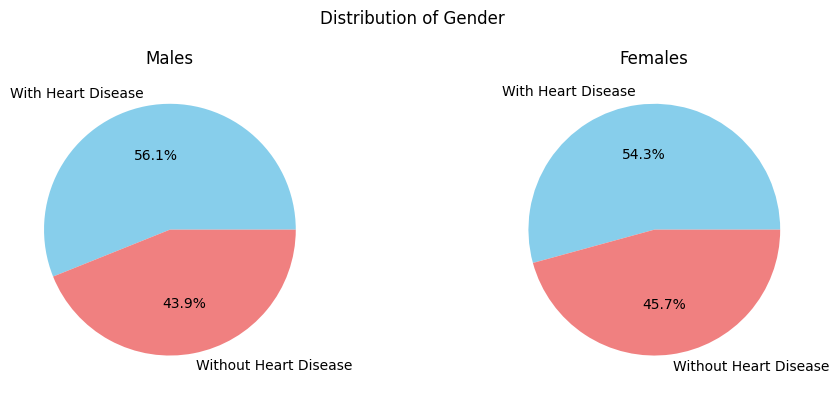

Males:
Presence of Heart Disease: 406
Absence of Heart Disease: 318

Females:
Presence of Heart Disease: 121
Absence of Heart Disease: 102


In [16]:
# Create subplots for male data visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.suptitle('Distribution of Gender')

# Number of individuals with and without heart disease by gender for males
male_1 = df.loc[(df.Classification == 1) & (df.Gender == 1)].shape[0]
male_0 = df.loc[(df.Classification == 0) & (df.Gender == 1)].shape[0]

axes[0].pie([male_1, male_0], labels=['With Heart Disease', 'Without Heart Disease'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0].set_title('Males')

# Number of individuals with and without heart disease by gender for females
female_1 = df.loc[(df.Classification == 1) & (df.Gender == 0)].shape[0]
female_0 = df.loc[(df.Classification == 0) & (df.Gender == 0)].shape[0]

axes[1].pie([female_1, female_0], labels=['With Heart Disease', 'Without Heart Disease'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Females')

plt.tight_layout()
plt.show()

# Print numbers for males
print("Males:")
print("Presence of Heart Disease:", male_1)
print("Absence of Heart Disease:", male_0)

# Print numbers for females
print("\nFemales:")
print("Presence of Heart Disease:", female_1)
print("Absence of Heart Disease:", female_0)

Conclusion:
   - The analysis underscores the importance of considering gender disparities in understanding cardiovascular health outcomes.
   - Further research is needed to explore the underlying factors contributing to the observed gender differences in the prevalence of heart disease.
   - Addressing gender-specific risk factors and implementing targeted interventions may help mitigate disparities and improve cardiovascular health outcomes for all individuals.

### 4.2.How do various factors relate to the presence of heart disease?

Embark on an illuminating exploration of key health parameters associated with heart disease. In this comprehensive analysis, we delve into various metrics including resting blood pressure, serum cholesterol levels, maximum heart rate achieved, oldpeak values, the slope of the peak, fasting blood sugar levels, and the correlation between chest pain type and heart disease presence. Through meticulous examination, we aim to unravel the intricate relationship between these health indicators and the presence or absence of heart disease.

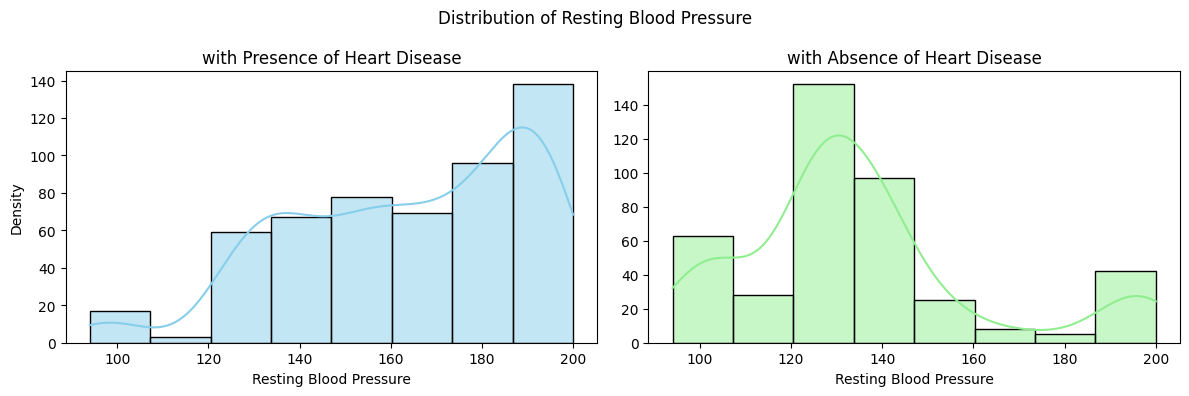

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle('Distribution of Resting Blood Pressure')
sns.histplot(df.loc[df.Classification == 1]["Resting blood pressure"], kde=True, color="skyblue", ax=axes[0],bins=8)
axes[0].set_title('with Presence of Heart Disease')
axes[0].set_xlabel('Resting Blood Pressure')
axes[0].set_ylabel('Density')

sns.histplot(df.loc[df.Classification == 0]["Resting blood pressure"], kde=True, color="lightgreen", ax=axes[1],bins=8)
axes[1].set_title('with Absence of Heart Disease')
axes[1].set_xlabel('Resting Blood Pressure')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

The distribution of resting blood pressure among individuals with heart disease reveals that the majority exhibit blood pressure readings ranging from 185 to 200, indicating a heightened susceptibility to the condition. Conversely, the distribution of resting blood pressure among individuals without heart disease demonstrates that most fall within the range of 120 to 140, with some approaching 100, indicative of normal readings.

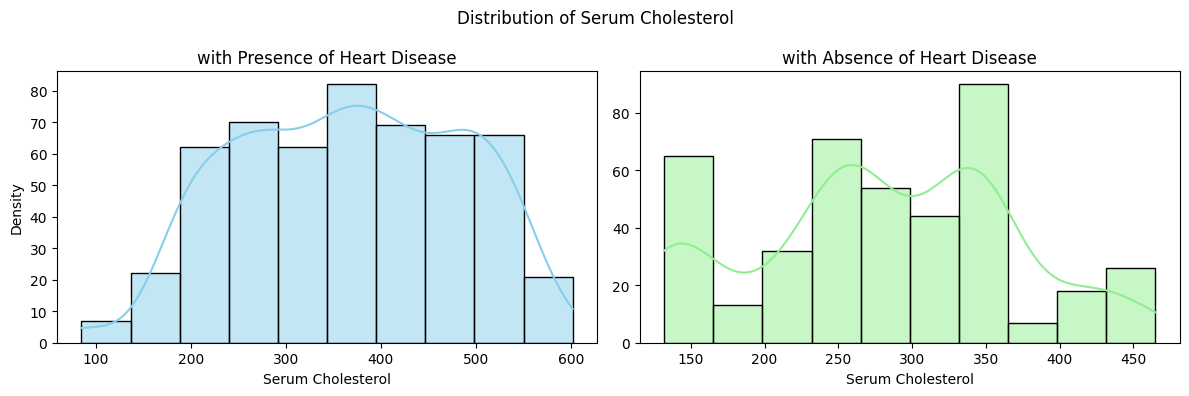

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle('Distribution of Serum Cholesterol')
sns.histplot(df.loc[df.Classification == 1]["Serum cholesterol"], kde=True, color="skyblue", ax=axes[0],bins=10)
axes[0].set_title('with Presence of Heart Disease')
axes[0].set_xlabel('Serum Cholesterol')
axes[0].set_ylabel('Density')

sns.histplot(df.loc[df.Classification == 0]["Serum cholesterol"], kde=True, color="lightgreen", ax=axes[1],bins=10)
axes[1].set_title('with Absence of Heart Disease')
axes[1].set_xlabel('Serum Cholesterol')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

The distribution of serum cholesterol among individuals with heart disease reveals that the majority exhibit cholesterol levels averaging higher than 350, with some reaching a maximum of almost 600, indicating a predisposition to the condition. Conversely, the distribution of serum cholesterol among individuals without heart disease demonstrates that most have cholesterol levels up to 350, with the majority averaging around 150, which are indicative of normal readings.

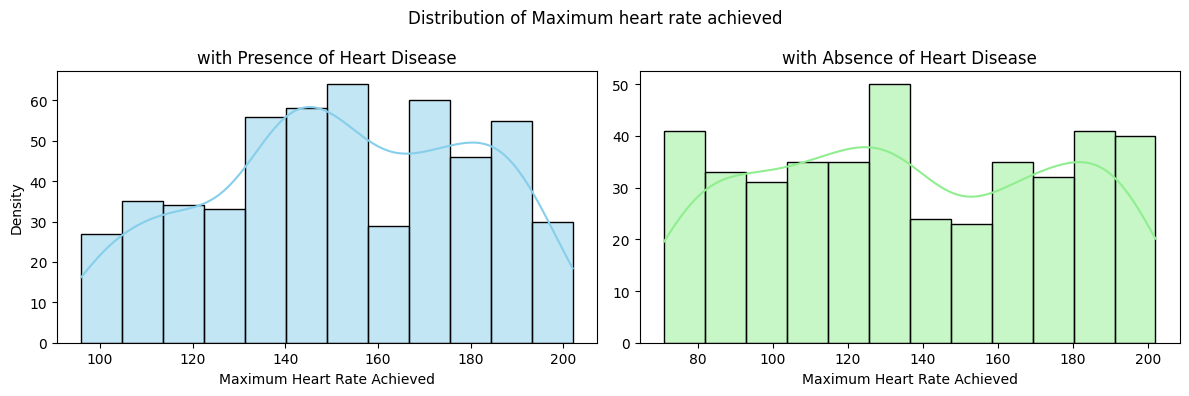

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle('Distribution of Maximum heart rate achieved')
sns.histplot(df.loc[df.Classification == 1]["Maximum heart rate achieved"], kde=True, color="skyblue", ax=axes[0],bins=12)
axes[0].set_title('with Presence of Heart Disease')
axes[0].set_xlabel('Maximum Heart Rate Achieved')
axes[0].set_ylabel('Density')

sns.histplot(df.loc[df.Classification == 0]["Maximum heart rate achieved"], kde=True, color="lightgreen", ax=axes[1],bins=12)
axes[1].set_title('with Absence of Heart Disease')
axes[1].set_xlabel('Maximum Heart Rate Achieved')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

The distribution of maximum heart rate achieved among individuals with heart disease reveals that the majority have a maximum heart rate ranging from 130 to 160, with some reaching as high as 180. Conversely, the distribution of maximum heart rate achieved among individuals without heart disease demonstrates that most have a maximum heart rate averaging between 120 and 140, with the majority also reaching up to 200.

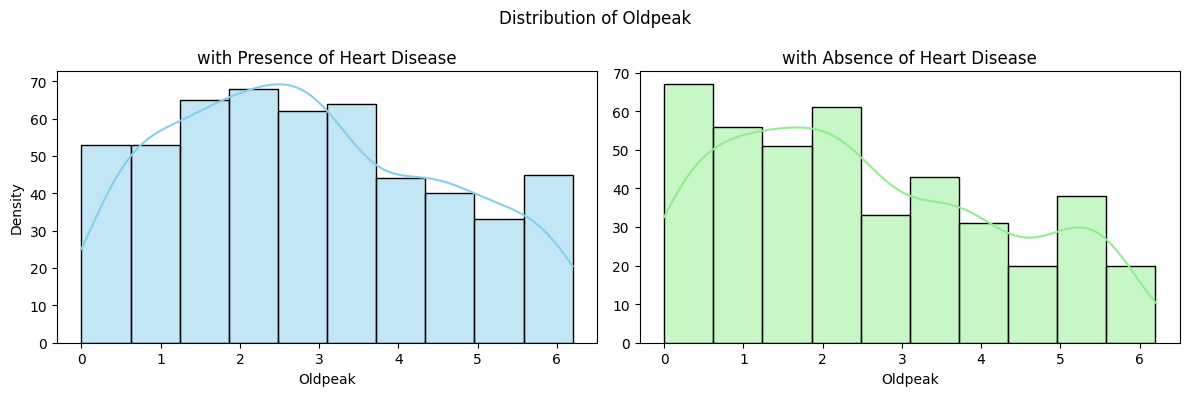

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle('Distribution of Oldpeak')
sns.histplot(df.loc[df.Classification == 1]["Oldpeak"], kde=True, color="skyblue", ax=axes[0],bins=10)
axes[0].set_title('with Presence of Heart Disease')
axes[0].set_xlabel('Oldpeak')
axes[0].set_ylabel('Density')

sns.histplot(df.loc[df.Classification == 0]["Oldpeak"], kde=True, color="lightgreen", ax=axes[1],bins=10)
axes[1].set_title('with Absence of Heart Disease')
axes[1].set_xlabel('Oldpeak')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

The distribution of oldpeak among individuals with heart disease reveals that the majority exhibit values between 2 and 4, with most reaching up to 6. Conversely, the distribution of oldpeak among individuals without heart disease shows that most have values between 0 and 2, with very few reaching 5 or 6.

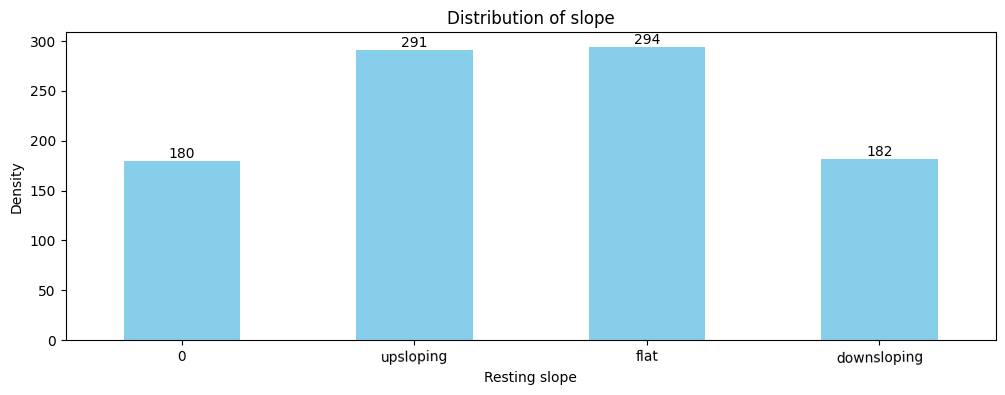

In [21]:
chestpain_labels = {0:'0',1: 'upsloping', 2: 'flat',3:'downsloping'}
re= df['Slope of the peak'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(12, 4))
 
for p in re.patches:
    re.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')
 
re.set_xticklabels([chestpain_labels[i] for i in re.get_xticks()], rotation=1)
 
plt.title('Distribution of slope')
plt.xlabel('Resting slope')
plt.ylabel('Density')
plt.show()

The distribution of slope of the peak shows that none of them are at 180 individuals, 291 are prone to have upsloping, 294 are prone to have flat, and 182 individuals are downsloping.

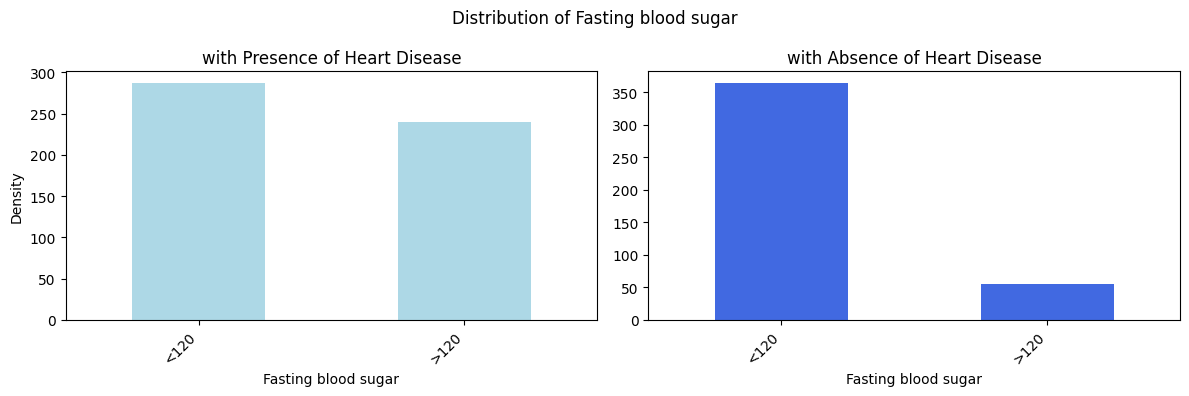

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle('Distribution of Fasting blood sugar')
fastingbloodsugar_1 = df.loc[df.Classification == 1]["Fasting blood sugar"]
fastingbloodsugar_1.value_counts().plot(kind="bar", color='lightblue', ax=axes[0])
label = ['<120', '>120']
axes[0].set_xticklabels(label, rotation=45, ha='right')
axes[0].set_title('with Presence of Heart Disease')
axes[0].set_xlabel('Fasting blood sugar')
axes[0].set_ylabel('Density')

fastingbloodsugar_0 = df.loc[df.Classification == 0]["Fasting blood sugar"]
fastingbloodsugar_0.value_counts().plot(kind="bar", color='royalblue', ax=axes[1])
label = ['<120', '>120']
axes[1].set_xticklabels(label, rotation=45, ha='right')
axes[1].set_title('with Absence of Heart Disease')
axes[1].set_xlabel('Fasting blood sugar')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

The distribution of fasting blood sugar among individuals with heart disease shows that nearly 300 individuals have blood sugar levels less than 120, while almost 230 individuals have levels higher than 120. In contrast, among individuals without heart disease, 360 individuals have blood sugar levels less than 120, and only 50 individuals have levels higher than 120.

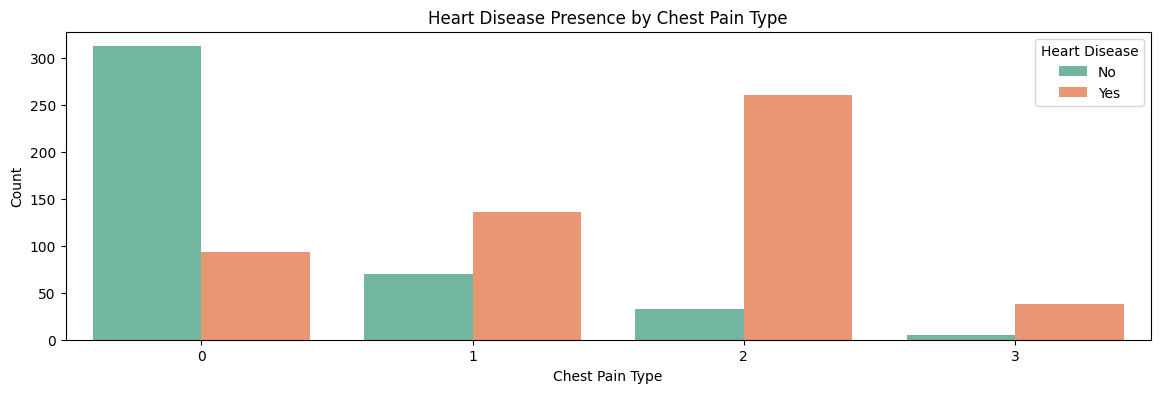

In [23]:
plt.figure(figsize=(14, 4))
sns.countplot(x='Chest pain type', hue='Classification', data=df, palette='Set2')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

The distribution of chest pain type among individuals with heart disease reveals that almost 100 individuals experience typical angina, approximately 150 have atypical angina, about 250 have non-anginal pain, and 45 are asymptomatic. Conversely, among individuals without heart disease, more than 300 experience typical angina, nearly 70 have atypical angina, only 26 have non-anginal pain, and nearly 4 are asymptomatic.

The analysis of various health parameters among elderly individuals with and without heart disease provides valuable insights into the differences in physiological indicators between the two groups. Resting Blood Pressure: Individuals with heart disease exhibit significantly higher resting blood pressure levels, with the majority falling within the hypertensive range (185-200 mmHg). In contrast, those without heart disease demonstrate blood pressure readings within the normal range (120-140 mmHg), indicative of a healthier cardiovascular status. Serum Cholesterol: Elevated serum cholesterol levels are prominent among individuals with heart disease, suggesting a predisposition to the condition. Conversely, individuals without heart disease display cholesterol levels within the normal range, emphasizing the importance of cholesterol management in preventing heart disease. Maximum Heart Rate Achieved: The distribution of maximum heart rates among individuals with heart disease reflects increased cardiac stress, with higher average heart rates observed compared to those without the condition. This difference underscores the impact of heart disease on cardiac function and stress response. Oldpeak: The presence of heart disease correlates with higher oldpeak values, indicating greater myocardial ischemia during exercise. In contrast, individuals without heart disease exhibit lower oldpeak values, suggesting healthier cardiovascular responses to physical exertion. Slope of the Peak: While the distribution of slope categories shows some variation, no significant differences are observed between individuals with and without heart disease, indicating that this parameter may not be as strongly associated with the presence of the condition. Fasting Blood Sugar: Individuals with heart disease tend to have higher fasting blood sugar levels compared to those without the condition. This finding underscores the importance of glycemic control in managing cardiovascular health. Chest Pain Type: The distribution of chest pain types reveals notable differences between individuals with and without heart disease. Typical angina is more prevalent among those without heart disease, whereas atypical angina and non-anginal pain are more common among individuals with the condition. This highlights the diverse clinical presentations of heart disease and the importance of considering multiple symptoms in diagnosis.

In conclusion, the analysis illustrates distinct patterns in various health parameters between elderly individuals with and without heart disease. Elevated resting blood pressure, serum cholesterol, maximum heart rate achieved, oldpeak values, and fasting blood sugar levels are associated with the presence of heart disease, reflecting underlying cardiovascular dysfunction. Conversely, normal readings in these parameters are indicative of a healthier cardiovascular profile. Additionally, differences in chest pain type distribution further emphasize the diverse clinical manifestations of heart disease. These findings underscore the importance of comprehensive cardiovascular assessment and risk management strategies to mitigate the burden of heart disease in the elderly population.

### 4.3 How does the distribution of blood pressure compare to that of cholesterol levels

To assess the distribution of blood pressure and cholesterol levels within the dataset, we conducted an analysis and visualization of these two key cardiovascular risk factors.

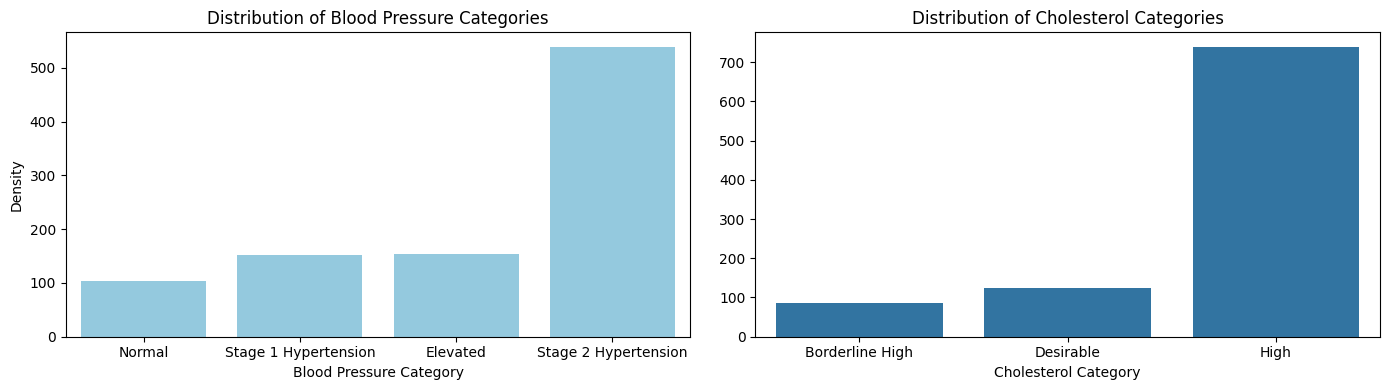

Counts for Blood Pressure Categories:
Blood pressure category
Stage 2 Hypertension    539
Elevated                153
Stage 1 Hypertension    152
Normal                  103
Name: count, dtype: int64

Counts for Cholesterol Categories:
Cholesterol category
High               739
Desirable          123
Borderline High     85
Name: count, dtype: int64


In [56]:
plt.figure(figsize=(14, 4))

# Plot Blood Pressure Category
plt.subplot(1, 2, 1)
sns.countplot(x='Blood pressure category', data=df,legend=False,color='skyblue')
plt.title('Distribution of Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Density')

# Plot Cholesterol Category
plt.subplot(1, 2, 2)
sns.countplot(x='Cholesterol category', data=df,legend=False)
plt.title('Distribution of Cholesterol Categories')
plt.xlabel('Cholesterol Category')
plt.ylabel('')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

print("Counts for Blood Pressure Categories:")
print(df['Blood pressure category'].value_counts())

print("\nCounts for Cholesterol Categories:")
print(df['Cholesterol category'].value_counts())

- **Blood Pressure Category:** 
  - The distribution of blood pressure categories reveals that the majority of individuals fall into the "Stage 2 Hypertension" category, followed by "Elevated" and "Stage 1 Hypertension." A smaller proportion of individuals have "Normal" blood pressure levels.
  
- **Cholesterol Category:** 
  - In terms of cholesterol categories, the majority of individuals have "High" cholesterol levels, indicating elevated cardiovascular risk. There are fewer individuals with "Borderline High" and "Desirable" cholesterol levels.

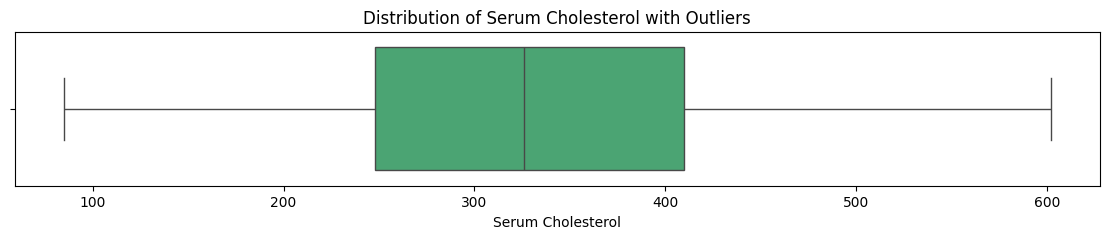

25th percentile (Q1): 248.0
50th percentile (Median/Q2): 326.0
75th percentile (Q3): 410.0


In [25]:
plt.figure(figsize=(14, 2))
sns.boxplot(x='Serum cholesterol', data=df,legend=False,color='mediumseagreen')
plt.title('Distribution of Serum Cholesterol with Outliers')
plt.xlabel('Serum Cholesterol')
plt.show()
quartiles = df['Serum cholesterol'].describe(percentiles=[.25, .5, .75])
print("25th percentile (Q1):", quartiles['25%'])
print("50th percentile (Median/Q2):", quartiles['50%'])
print("75th percentile (Q3):", quartiles['75%'])

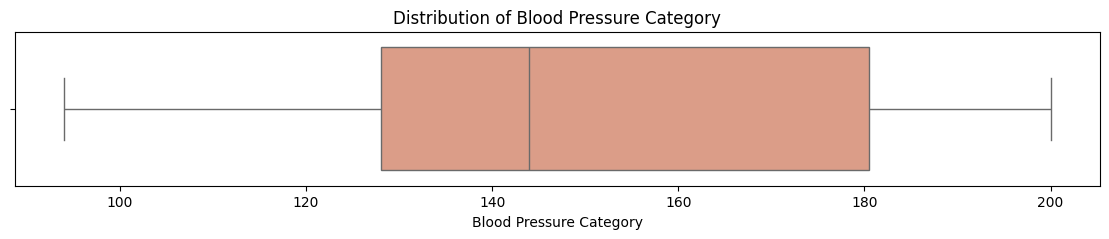

25th percentile (Q1): 128.0
50th percentile (Median/Q2): 144.0
75th percentile (Q3): 180.5


In [26]:
plt.figure(figsize=(14, 2))
sns.boxplot(x='Resting blood pressure', data=df,legend=False,color='darksalmon')
plt.title('Distribution of Blood Pressure Category')
plt.xlabel('Blood Pressure Category')
plt.show()
quartiles = df['Resting blood pressure'].describe(percentiles=[.25, .5, .75])
print("25th percentile (Q1):", quartiles['25%'])
print("50th percentile (Median/Q2):", quartiles['50%'])
print("75th percentile (Q3):", quartiles['75%'])

- We further examined the distribution of blood pressure and cholesterol levels using boxplots. 
  - The boxplot for serum cholesterol levels reveals a median cholesterol level of 326 mg/dl, with the 25th and 75th percentiles at 248 mg/dl and 410 mg/dl, respectively. The boxplot also indicates the presence of outliers with cholesterol levels exceeding 600 mg/dl.
  - Similarly, the boxplot for resting blood pressure shows a median blood pressure of 144 mm Hg, with the 25th and 75th percentiles at 128 mm Hg and 180.5 mm Hg, respectively. Outliers with blood pressure levels as low as 94 mm Hg and as high as 200 mm Hg are observed.

Top 10 people, who have the highest blood pressure and cholesterol

In [27]:
# Sort the DataFrame by resting blood pressure in descending order
sorted_df = df.sort_values(by='Resting blood pressure', ascending=False)
# Select the top 10 individuals with the highest blood pressure
top_10_highest = sorted_df.head(10)
top_10_highest[['Patient Identification Number', 'Resting blood pressure']]

,Patient Identification Number,Resting blood pressure
243,2616816,200
32,557682,200
61,783103,200
355,3687703,200
159,1735652,200
814,8667937,200
755,8164041,200
722,7818937,200
874,9252549,200
856,9080286,200


In [28]:
sorted_df = df.sort_values(by='Serum cholesterol', ascending=False)
# Select the top 10 individuals with the highest blood pressure
top_10_highest = sorted_df.head(10)
top_10_highest[['Patient Identification Number', 'Serum cholesterol']]

,Patient Identification Number,Serum cholesterol
300,3142651,602
179,1932417,602
721,7797411,601
419,4503480,601
748,8104279,601
303,3168369,561
69,891449,561
518,5587450,560
402,4287435,559
585,6330462,559


In [29]:
sorted_df = df.sort_values(by='Resting blood pressure', ascending=False)
top_10_highest = sorted_df.tail(10)
top_10_highest[['Patient Identification Number', 'Resting blood pressure']]

,Patient Identification Number,Resting blood pressure
887,9317240,95
617,6725750,95
0,119250,94
924,9718692,94
846,8976590,94
728,7905830,94
711,7712383,94
281,2956524,94
192,2080399,94
473,4994167,94


In [30]:
sorted_df = df.sort_values(by='Serum cholesterol', ascending=False)
top_10_highest = sorted_df.tail(10)
top_10_highest[['Patient Identification Number', 'Serum cholesterol']]

,Patient Identification Number,Serum cholesterol
599,6566981,132
553,6039277,132
180,1943334,132
71,914670,87
198,2114615,87
208,2245558,86
103,1226161,86
734,7944298,86
29,509328,86
613,6685146,85


- We identified the top 10 individuals with the highest blood pressure and cholesterol levels in the dataset. 
  - The individuals with the highest blood pressure levels have readings of 200 mm Hg, while those with the highest cholesterol levels have readings of 602 mg/dl. These individuals represent extreme cases of cardiovascular risk factors within the dataset.

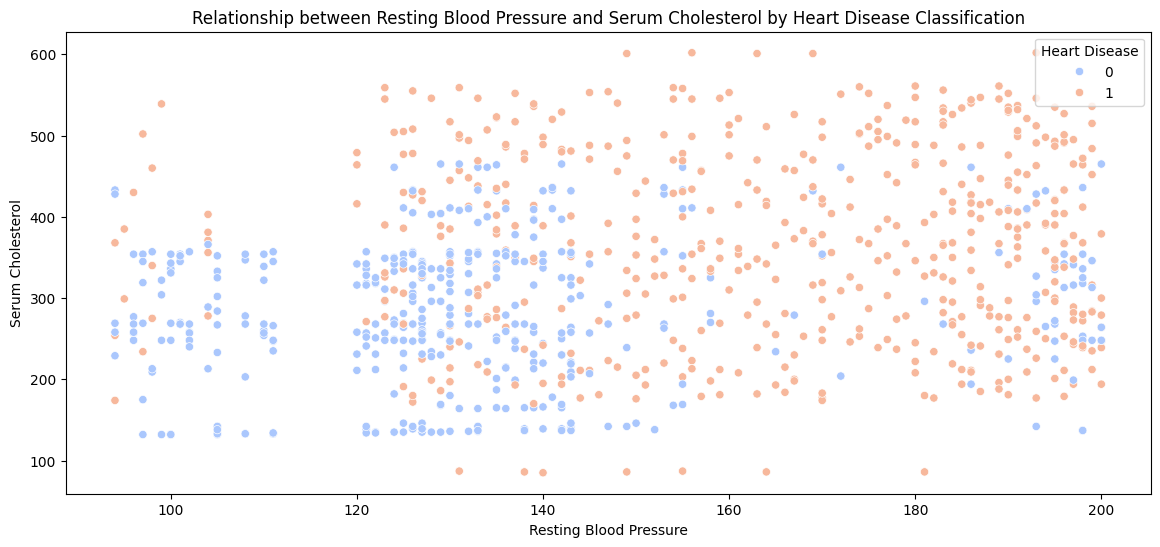

In [31]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Resting blood pressure', y='Serum cholesterol', hue='Classification', data=df, palette='coolwarm')
plt.title('Relationship between Resting Blood Pressure and Serum Cholesterol by Heart Disease Classification')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Serum Cholesterol')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

In [32]:
# Calculate correlation coefficient between 'Serum cholesterol' and 'Resting blood pressure'
correlation_coefficient = df['Serum cholesterol'].corr(df['Resting blood pressure'])

# Print correlation coefficient
print("Correlation Coefficient between Serum Cholesterol and Resting Blood Pressure:", correlation_coefficient)

Correlation Coefficient between Serum Cholesterol and Resting Blood Pressure: 0.22123878887749962


- We explored the relationship between resting blood pressure and serum cholesterol levels using a scatterplot. 
  - The scatterplot indicates a positive correlation between blood pressure and cholesterol levels, albeit with a correlation coefficient of 0.22. This suggests a weak positive relationship between the two variables.

Overall, the analysis provides valuable insights into the distribution and relationship between blood pressure and cholesterol levels, key indicators of cardiovascular health and risk within the study population.

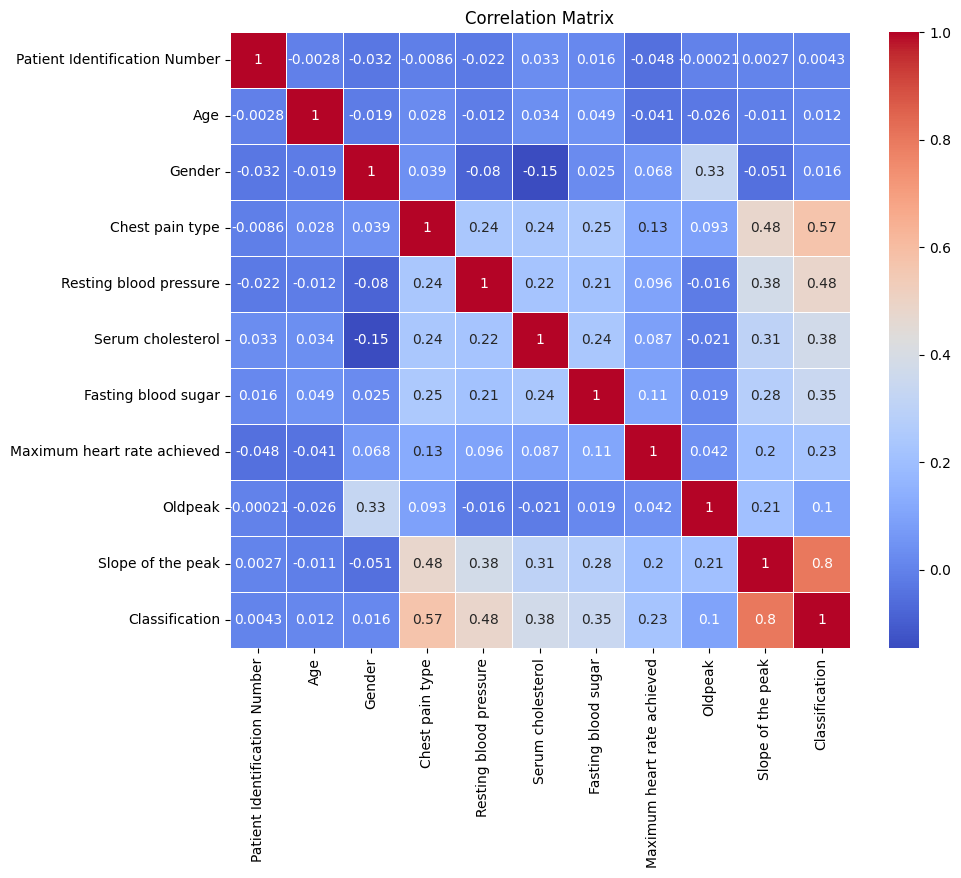

In [33]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### 4.4.How do health condition distributions differ among elderly individuals with and without heart disease??

This analysis aims to investigate the disparities in health condition distributions and mean values among elderly individuals, categorized based on their heart disease status. The data is segmented into two groups: elderly individuals with heart disease and those without heart disease.

Distribution of Health Conditions: Two pie charts illustrate the gender distribution within each group. The first chart focuses on elderly individuals (age > 60) with heart disease, while the second chart depicts those without heart disease. The pie charts provide insights into the gender balance within each subgroup.

In [35]:
age_tregt=df.query('Age >60 and Classification == 1')

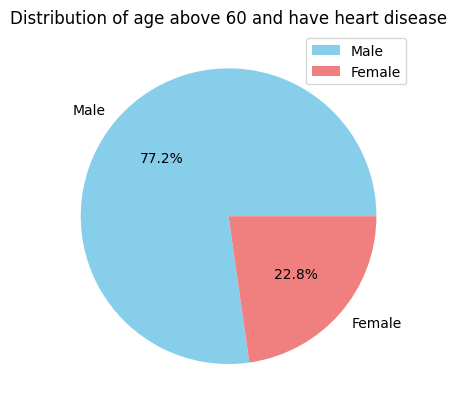

In [36]:
g = age_tregt['Gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']  
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of age above 60 and have heart disease')
plt.show()

In [37]:
age_tregt1=df.query('Age >60 and Classification == 0')

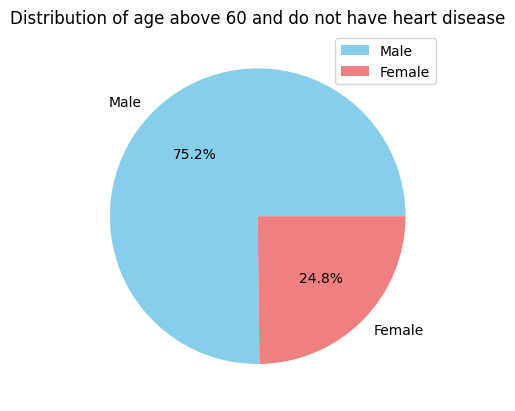

In [38]:
g = age_tregt1['Gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']  
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of age above 60 and do not have heart disease')
plt.show()

Following the age analysis, histograms are presented for each health condition, allowing for a visual understanding of the distribution of chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, maximum heart rate achieved, old peak, and slope of the peak among elderly individuals with heart disease.
Here we observe that the majority of individuals experience non-anginal chest pain. Resting blood pressure is nearly 200, with some individuals showing levels around this mark. Serum cholesterol levels for some individuals are close to 600, while the average serum cholesterol level is over 400. Individuals with fasting blood sugar levels exceeding the norm are present. The average maximum heart rate is approximately 155 beats per minute. The average oldpeak is nearly 3. Additionally, the distribution of the slope of the peak shows a predominant indicator of 2.

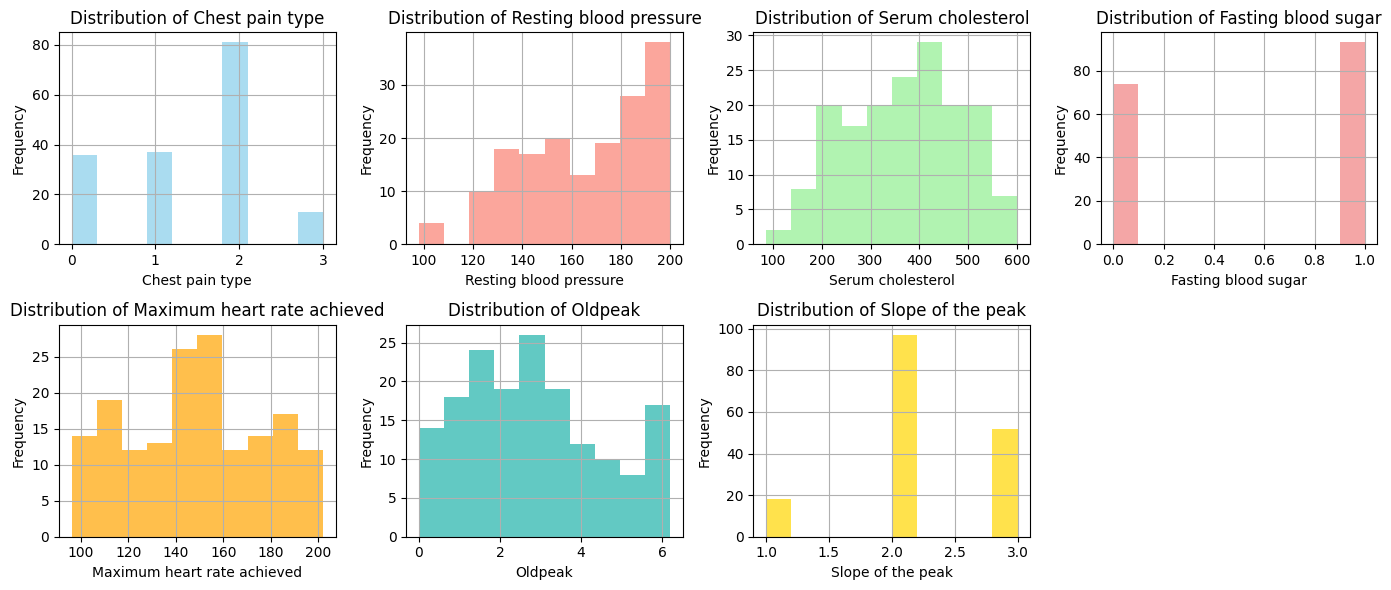

In [39]:
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'orange', 'lightseagreen', 'gold']

# Plot histograms for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))

columns_to_plot = ['Chest pain type', 'Resting blood pressure', 'Serum cholesterol', 
                   'Fasting blood sugar', 'Maximum heart rate achieved', 'Oldpeak', 
                   'Slope of the peak']

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    age_tregt[column].hist(ax=ax, color=colors[i], alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide the extra subplots
for j in range(len(columns_to_plot), len(axes.flat)):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

Following the age analysis, histograms are presented for each health condition, allowing for a visual understanding of the distribution of chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, maximum heart rate achieved, old peak, and slope of the peak among elderly individuals without heart disease. Here we observe that the majority of individuals experience typical angina. Resting blood pressure is nearly 130, with some individuals showing levels around this mark. The maximum serum cholesterol level equals 450, while the average serum cholesterol is higher than 230. Additionally, most individuals have an average serum cholesterol level of around 350, with a frequency of 26. Furthermore, it's notable that a significant number of individuals, 19 in total, have levels lower than 200. Individuals without fasting blood sugar levels exceeding the norm are predominant, with a frequency of 120. The average maximum heart rate falls between 80 and 130 beats per minute.e.Oldpeak values indicate that most individuals fall within the range of 0 to 2, although the maximum value reaches 4. The distribution of the slope of the peak is mainly categorized as 1 and 0

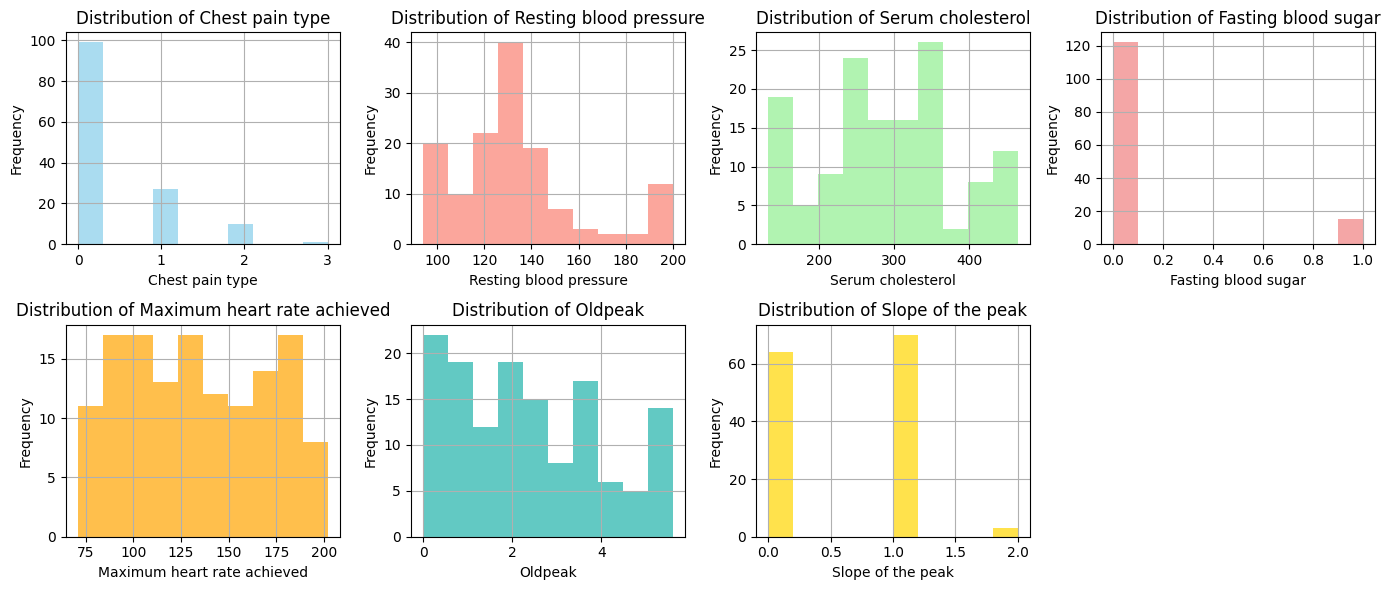

In [40]:
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'orange', 'lightseagreen', 'gold']

# Plot histograms for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))

columns_to_plot = ['Chest pain type', 'Resting blood pressure', 'Serum cholesterol', 
                   'Fasting blood sugar', 'Maximum heart rate achieved', 'Oldpeak', 
                   'Slope of the peak']

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    age_tregt1[column].hist(ax=ax, color=colors[i], alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide the extra subplots
for j in range(len(columns_to_plot), len(axes.flat)):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

The mean of resting blood pressure of individuals older than 60 and who have disease is 160, while who do not have disease is 125. The mean of serum cholesterol of individuals older than 60 and who have disease is 360, while who do not have disease is 280. The mean of maximum heart rate achieved of individuals older than 60 and who have disease is 140, while who do not have disease is 125

Mean of conditions for age > 60 and have diseases: 227.2754491017964
Mean of conditions for age > 60 and do not have diseases: 185.17031630170314


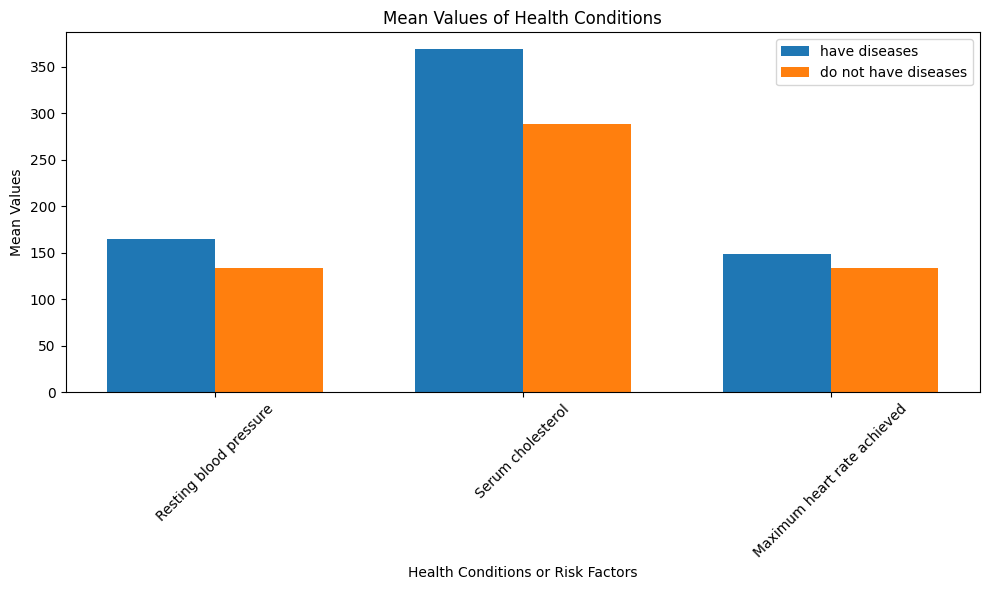

In [41]:
conditions = ['Resting blood pressure', 'Serum cholesterol', 'Maximum heart rate achieved']

# Calculate the mean or median values of each condition among individuals older than 60 with heart disease
values_over_60 = [age_tregt[condition].mean() for condition in conditions]
# Calculate the mean or median values for individuals older than 60
mean_over_60 = np.mean(values_over_60)
print("Mean of conditions for age > 60 and have diseases:", mean_over_60)

# Calculate the mean or median values of each condition among individuals younger than 30 with heart disease
values_over_60n = [age_tregt1[condition].mean() for condition in conditions]
# Calculate the mean or median values for individuals younger than 30
mean_over_60n = np.mean(values_over_60n)
print("Mean of conditions for age > 60 and do not have diseases:", mean_over_60n)

# Plot side-by-side bar plots to compare the prevalence of health conditions between the two age groups
bar_width = 0.35
index = np.arange(len(conditions))

plt.figure(figsize=(10, 6))
plt.bar(index, values_over_60, width=bar_width, label='have diseases')
plt.bar(index + bar_width, values_over_60n, width=bar_width, label='do not have diseases')

plt.xlabel('Health Conditions or Risk Factors')
plt.ylabel('Mean Values')
plt.title('Mean Values of Health Conditions')
plt.xticks(index + bar_width / 2, conditions, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### 4.5.Is it possible to construct a regression model that predicts cardiovascular disease risk based on all available traits?

Finally, we explore the possibility of constructing a regression model that predicts cardiovascular disease risk based on all available traits. By leveraging machine learning techniques, we aim to develop a predictive model that can assist in early detection and prevention efforts for heart disease.

In [42]:
# Separate features (X) and target variable (y)
X = df.drop(columns=["Patient Identification Number", "Classification", "Blood pressure category", "Cholesterol category"])
y = df["Classification"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.968421052631579

Confusion Matrix:
[[ 79   2]
 [  4 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        81
           1       0.98      0.96      0.97       109

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



Model Construction and Training:
- **Feature Selection:** 
  - The features considered for prediction included various cardiovascular risk factors such as age, gender, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, maximum heart rate achieved, ST depression, and slope of the peak.
- **Target Variable:** 
  - The target variable was the presence or absence of heart disease, represented as binary classification (1 for presence, 0 for absence).
- **Data Splitting:** 
  - The dataset was split into training and testing sets with a ratio of 80:20, respectively, to ensure robust evaluation of the model's performance.
- **Feature Scaling:** 
  - Standardization was applied to the features to ensure uniform scaling and mitigate the influence of outliers on model performance.
- **Model Training:** 
  - A logistic regression model was initialized and trained on the standardized training data.

With an accuracy of 96.5%, thelogic regression model demonstrates strong predictive performance in determining cardiovascular disease risk based on the available traits. The confusion matrix and classification report further support the model's effectiveness, showing high precision, recall, and F1-scores for both classes (0 and 1), indicating balanced performance across different evaluation metrics.

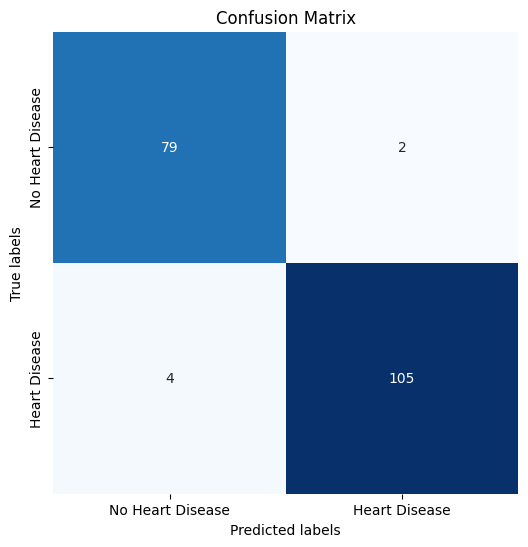

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Model Evaluation:
- **Accuracy:** 
  - The trained logistic regression model achieved an impressive accuracy of 96.84% on the testing set, indicating its ability to effectively classify individuals into the presence or absence of heart disease.
- **Confusion Matrix:** 
  - The confusion matrix reveals the model's performance in classifying true positive, true negative, false positive, and false negative instances. The majority of cases were accurately classified, with minimal misclassifications.
- **Classification Report:** 
  - The classification report provides a comprehensive evaluation of the model's precision, recall, and F1-score for both classes (presence and absence of heart disease). The high precision and recall values suggest that the model performs well in identifying individuals with and without heart disease.

Conclusion:
- The logistic regression model demonstrates promising performance in predicting cardiovascular disease risk based on all available traits.
- The high accuracy, supported by robust evaluation metrics, indicates the model's potential utility in clinical settings for risk assessment and early intervention.
- Further validation and refinement of the model could enhance its reliability and applicability in real-world scenarios.

---

## Evaluation form (Keep it!)

| Project part | Mark     | Comment   
|:-------:|:--------:|:----------------------
| Introduction       |   5/5    |     To get full pint, you need to give brief background of your project and why it is interesting for you. 
| Data description       |   5/5    | To get full point, you provide description of your dataset, namely columns.
| Research questions       |   5/5    | To get full point, you need to create at least 5 good, different, interseting questions. 
| Data prepartion       |   20/20    | To get full point, you need to show proficient skill in using pandas in the purpose of data preparation. 
| Data analysis and visualisation       |   30/30    | To get full point, you need to show proficient skill in using matplotlib or seaborn (or other libraries along with some pandas in the purpose of data visualisation and analysis. Also, you should commment all your graphs.
| Conclusion       |   5/5    | To get full point, you need to write summary of your finding in general.
| Structure and code       |   10/10    | To get full point, you need to write efficient code, and all the libraries should be properly used. Also, the whole project should be well structured. 
| Defense      |   20/20    | To get full point, students should properly present their projects during the defense and be able to answer questions from instructor.
| ML modelling       |   10/10 (bonus)    | 
|**Total**|**100/100**  | 
